# Bellabeat Case Study - FitBit Data Analysis in Python

This is the code documentation of my FitBit Fitness Tracker data analysis video presentation which can watched [here](https://youtu.be/DopUN9gu2X0). 

In this notebook, we'll explore the data, answer a few questions, write down some observations, and build some plots and tables.

I got the data sets from Kaggle which can be found in this [link](https://www.kaggle.com/datasets/arashnic/fitbit).

Since the data is already clean, we will be focusing now on data wrangling and manipulation, data exploration, and data visualization.

Generally, here are the tasks we'll be performing in this code documentation:
- Add columns to assign customer number for different IDs
- Transform activity days to date time format so we can get specific details such as time and date
- Map and standardize days of the week
- Create lineplots using seaborn and/or matplotlib
- Create tables to summarize relevant data

In [258]:
# import all the libraries we'll need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [259]:
# import all the data we need
dailySteps = pd.read_csv('dailySteps_merged.csv')
hourlySteps = pd.read_csv('hourlySteps_merged.csv')
dailyActivity = pd.read_csv('dailyActivity_merged.csv')
hourlyCalories = pd.read_csv('hourlyCalories_merged.csv')
hourlyIntensities = pd.read_csv('hourlyIntensities_merged.csv')
heartRate = pd.read_csv('heartrate_seconds_merged.csv')
minuteSleep = pd.read_csv('minuteSleep_merged.csv')
sleepDay = pd.read_csv('sleepDay_merged.csv')
weightInfo = pd.read_csv('weightLogInfo_merged.csv')

In [260]:
# set up customers (IDs from data set) and days of the week map for later use
Customers = {1503960366:'Customer 1',1624580081:'Customer 2',1644430081:'Customer 3',1844505072:'Customer 4',1927972279:'Customer 5',2022484408:'Customer 6',2026352035:'Customer 7',2320127002:'Customer 8',2347167796:'Customer 9',2873212765:'Customer 10',3372868164:'Customer 11',3977333714:'Customer 12',4020332650:'Customer 13',4057192912:'Customer 14',4319703577:'Customer 15',4388161847:'Customer 16',4445114986:'Customer 17',4558609924:'Customer 18',4702921684:'Customer 19',5553957443:'Customer 20',5577150313:'Customer 21',6117666160:'Customer 22',6290855005:'Customer 23',6775888955:'Customer 24',6962181067:'Customer 25',7007744171:'Customer 26',7086361926:'Customer 27',8053475328:'Customer 28',8253242879:'Customer 29',8378563200:'Customer 30',8583815059:'Customer 31',8792009665:'Customer 32',8877689391:'Customer 33'}
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [261]:
#set up the general appearance of the plots
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.5) 

Let's begin answering some questions:

1. Which day/s have the most number of steps?

In [262]:
# We use the dailySteps data set then manipulate it to looks for trends in steps
dailySteps['ActivityDay'] = pd.to_datetime(dailySteps['ActivityDay'])
dailySteps.insert(loc=1,column='Customer',value=dailySteps['Id'].map(Customers))
dailySteps.insert(loc=3,column='Day of Week',value=dailySteps['ActivityDay'].apply(lambda x:x.day_of_week))
dailySteps['Day of Week'] = dailySteps['Day of Week'].map(dmap)

In [263]:
dailySteps.head()

,Id,Customer,ActivityDay,Day of Week,StepTotal
0,1503960366,Customer 1,2016-04-12,Tue,13162
1,1503960366,Customer 1,2016-04-13,Wed,10735
2,1503960366,Customer 1,2016-04-14,Thu,10460
3,1503960366,Customer 1,2016-04-15,Fri,9762
4,1503960366,Customer 1,2016-04-16,Sat,12669


Text(0.5, 1.0, 'Average Number of Steps per Day')

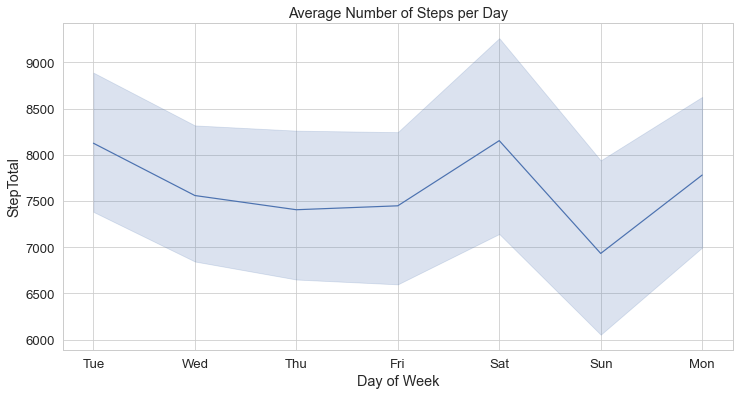

In [264]:
# Let's plot it 
plt.figure(figsize=(12,6))
sns.lineplot(x='Day of Week',y='StepTotal',data=dailySteps)
plt.title('Average Number of Steps per Day')

In [265]:
# We create a pivot table showing step averages per day
pivot1 = dailySteps.pivot_table(values='StepTotal',index='Day of Week',aggfunc='mean')
pivot_dailySteps = pivot1.sort_values(by=['StepTotal'], ascending=False)
pivot_dailySteps['StepTotal'] = round(pivot_dailySteps['StepTotal'])
pivot_dailySteps

,StepTotal
Day of Week,
Sat,8153.0
Tue,8125.0
Mon,7781.0
Wed,7559.0
Fri,7448.0
Thu,7406.0
Sun,6933.0


Observations:
 - Customers have the most steps on Saturdays, Mondays, and Tuesdays
 - The number of steps are almost the same on Wednesdays, Thursdays, and Fridays
 - The lowest number of steps is on Sundays
     * Inference: maybe Sundays are considered rest days so the customers don't move a lot on those days

2. Which hours of the day has the most number of steps?

In [266]:
# Here, we use the hourlySteps data set
hourlySteps['ActivityHour'] = pd.to_datetime(hourlySteps['ActivityHour'])
hourlySteps.insert(loc=2,column="Hour",value=hourlySteps['ActivityHour'].apply(lambda x:x.hour))

In [267]:
hourlySteps.head()

,Id,ActivityHour,Hour,StepTotal
0,1503960366,2016-04-12 00:00:00,0,373
1,1503960366,2016-04-12 01:00:00,1,160
2,1503960366,2016-04-12 02:00:00,2,151
3,1503960366,2016-04-12 03:00:00,3,0
4,1503960366,2016-04-12 04:00:00,4,0


Text(0.5, 1.0, 'Average Steps per Hour')

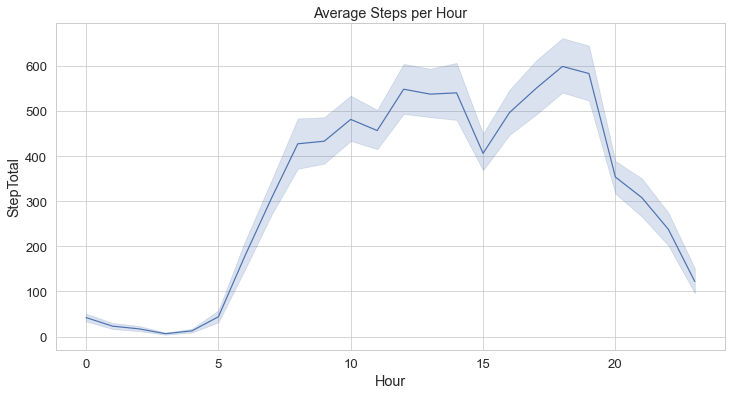

In [268]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Hour',y='StepTotal',data=hourlySteps)
plt.title('Average Steps per Hour')

In [269]:
pivot2 = hourlySteps.pivot_table(values='StepTotal',index='Hour',aggfunc='mean')
pivot_hourlySteps = pivot2.sort_values(by=['StepTotal'], ascending=False).reset_index()
pivot_hourlySteps['StepTotal'] = round(pivot_hourlySteps['StepTotal'])
pivot_hourlySteps.head()

,Hour,StepTotal
0,18,599.0
1,19,583.0
2,17,550.0
3,12,549.0
4,14,541.0


Observations:
* Hourly steps count start to rise at 5 in the morning
* Customers are consistently moving from about 7AM to about 8PM
* Customers are mostly moving from 12PM til afternoon but mostly in the evening 

Text(0.5, 1.0, 'Average Steps per Hour')

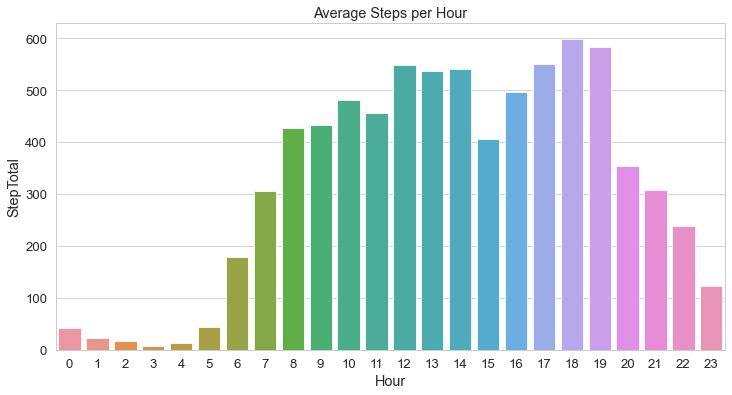

In [270]:
# Let's create a bar plot to have a better view of StepTotal
plt.figure(figsize=(12,6))
sns.barplot(x='Hour',y='StepTotal',data=pivot_hourlySteps)
plt.title('Average Steps per Hour')

Observations:
* The bar plot shows us specific times when customers were mostly active: 12NN-2PM & then peaks at 6PM-7PM
* This makes sense since probably the customers are employees who takes a lunch break then travels home in the evening

3. Which day of the week do customers travel the most?

In [271]:
# Let's now use and manipulate the dailyActivity data set
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'])
dailyActivity.insert(loc=2,column='Day of Week',value=dailyActivity['ActivityDate'].apply(lambda x:x.day_of_week))
dailyActivity['Day of Week'] = dailyActivity['Day of Week'].map(dmap)

In [272]:
dailyActivity.head()

,Id,ActivityDate,Day of Week,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,Tue,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,Wed,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,Thu,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,Fri,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,Sat,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Text(0, 0.5, 'TotalDistance (km)')

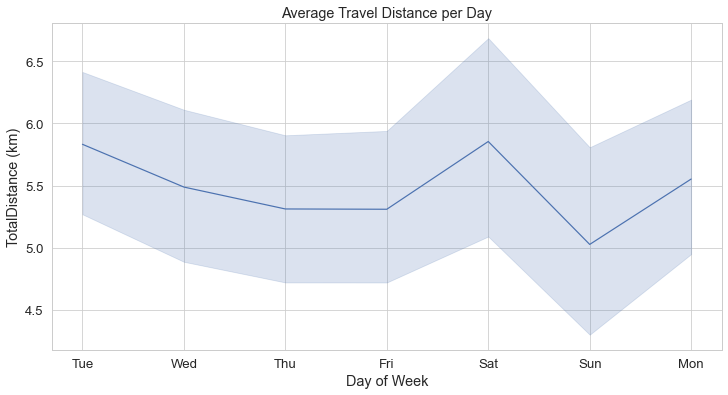

In [273]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Day of Week',y='TotalDistance',data=dailyActivity)
plt.title('Average Travel Distance per Day')
plt.ylabel('TotalDistance (km)')

Observations:
- On average, customers moved the most distance on Tuesdays and Saturdays.
- Wed-Fri are virtually the same distances.
- Mondays have a slightly higher distance.
- Sundays have the lowest, which may indicate that customers stay at home and don't travel a lot on those days.

4. Which hour of the day do customers burn the most calories?

In [274]:
# Using and manipulating the hourlyCalories data set to answer this question
hourlyCalories['ActivityHour'] = pd.to_datetime(hourlyCalories['ActivityHour'])
hourlyCalories.insert(loc=1,column='Customer',value=hourlyCalories['Id'].map(Customers))
hourlyCalories.insert(loc=3,column='Date',value=hourlyCalories['ActivityHour'].apply(lambda x:x.date()))
hourlyCalories.insert(loc=4,column='Day of Week',value=hourlyCalories['ActivityHour'].apply(lambda x:x.day_of_week))
hourlyCalories.insert(loc=5,column='Hour',value=hourlyCalories['ActivityHour'].apply(lambda x:x.hour))
hourlyCalories['Day of Week'] = hourlyCalories['Day of Week'].map(dmap)

In [275]:
hourlyCalories.head()

,Id,Customer,ActivityHour,Date,Day of Week,Hour,Calories
0,1503960366,Customer 1,2016-04-12 00:00:00,2016-04-12,Tue,0,81
1,1503960366,Customer 1,2016-04-12 01:00:00,2016-04-12,Tue,1,61
2,1503960366,Customer 1,2016-04-12 02:00:00,2016-04-12,Tue,2,59
3,1503960366,Customer 1,2016-04-12 03:00:00,2016-04-12,Tue,3,47
4,1503960366,Customer 1,2016-04-12 04:00:00,2016-04-12,Tue,4,48


Text(0.5, 1.0, 'Average Calories Expended per Hour')

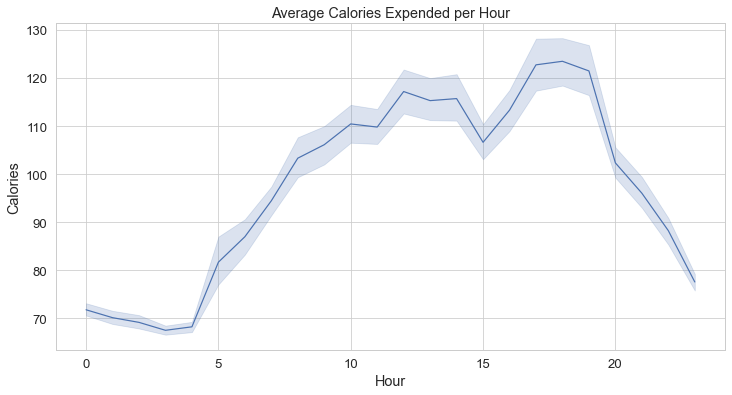

In [276]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Hour',y='Calories',data=hourlyCalories)
plt.title('Average Calories Expended per Hour')

Obeservations:
- We are seeing a correlation between steps and calories burned. The more steps they have, the higher the calories they expended
- However, the difference in calories can be deemed insignificant

5. Which day of the week do customers burn the most calories?

Text(0.5, 1.0, 'Average Calories Burned per Day')

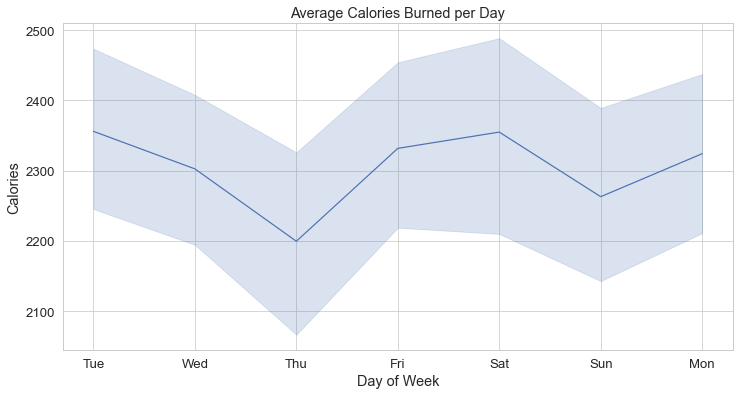

In [277]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Day of Week',y='Calories',data=dailyActivity)
plt.title('Average Calories Burned per Day')

In [278]:
pivot_calories = pd.pivot_table(index='Day of Week',values='Calories',data=dailyActivity,aggfunc='mean')
pivot_calories.sort_values(by='Calories',ascending=False)
pivot_calories['Calories'] = round(pivot_calories['Calories'])
pivot_calories

,Calories
Day of Week,
Fri,2332.0
Mon,2324.0
Sat,2355.0
Sun,2263.0
Thu,2200.0
Tue,2356.0
Wed,2303.0


Observations:
- Again, there seems to be a correlation between steps and calories. The days when customers had the most steps are also the days they burned calories the most (Saturdays and Tuesdays)
- There's virtually no difference in calories expenditure per day. There's no distinct evidence that customers tend to burn more on some days.
- I think we can infer that our customers are regular people who don't follow a particular diet or workout regimen. Generally, they're not trying to lose or gain weight.

6. Which hour/s of the day are customers mostly active?

In [279]:
# We utilize the hourlyIntensities data set for this question
hourlyIntensities['ActivityHour'] = pd.to_datetime(hourlyIntensities['ActivityHour'])
hourlyIntensities.insert(loc=2,column='Day of Week',value=hourlyIntensities['ActivityHour'].apply(lambda x:x.day_of_week))
hourlyIntensities.insert(loc=3,column='Hour',value=hourlyIntensities['ActivityHour'].apply(lambda x:x.hour))
hourlyIntensities['Day of Week'] = hourlyIntensities['Day of Week'].map(dmap)

In [280]:
hourlyIntensities.head()

,Id,ActivityHour,Day of Week,Hour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,Tue,0,20,0.333333
1,1503960366,2016-04-12 01:00:00,Tue,1,8,0.133333
2,1503960366,2016-04-12 02:00:00,Tue,2,7,0.116667
3,1503960366,2016-04-12 03:00:00,Tue,3,0,0.000000
4,1503960366,2016-04-12 04:00:00,Tue,4,0,0.000000


Text(0.5, 1.0, 'Most Active Hours of the Day')

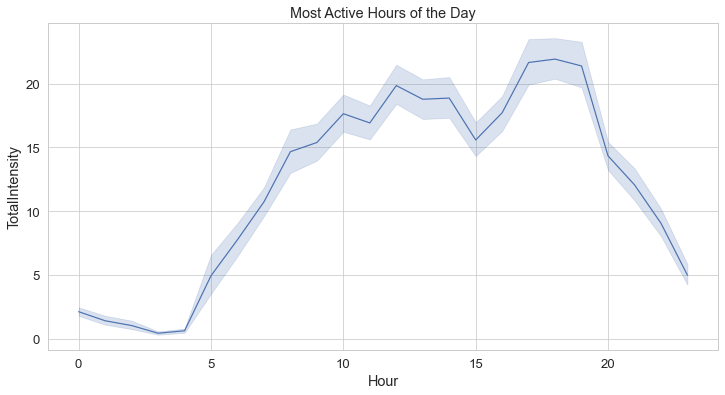

In [281]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Hour',y='TotalIntensity',data=hourlyIntensities)
plt.title('Most Active Hours of the Day')

Text(0.5, 1.0, 'Most Active Days of the Week')

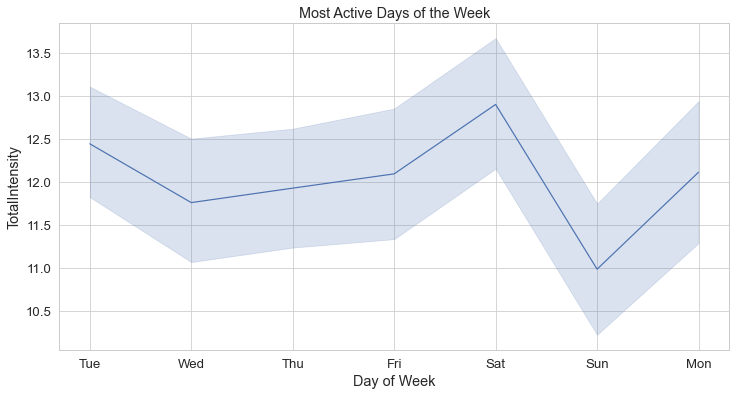

In [282]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Day of Week',y='TotalIntensity',data=hourlyIntensities)
plt.title('Most Active Days of the Week')

Observations:
* Again, just like steps, distance, and calories, customers are mostly active on lunch times and evenings then on Saturdays and Tuesdays
* We are seeing a consistency in the customers' movements
* Different data sets are showing the same trends in different data points
    - So far, we have examined steps, distance, calories, and most active days

7. Which day/s of the week are customers mostly active?
* Here, we'll do an analysis of their levels of activity namely: SEDENTARY, LIGHTLY ACTIVE, FAIRLY ACTIVE, VERY ACTIVE

In [283]:
# We're going to convert the minutes to hours:minutes using this function
def converter(minutes):
    hours = minutes / 60
    time = "{}".format(round(hours,2))
    return time

In [284]:
# We're creating a pivot table to convert all those minutes in the original data set
dailyAct_pivot = dailyActivity.pivot_table(index='Day of Week',values=['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes'])
dailyAct_pivot['SedentaryMinutes'] = [int(x) for x in round(dailyAct_pivot['SedentaryMinutes'])]
dailyAct_pivot['LightlyActiveMinutes'] = [int(x) for x in round(dailyAct_pivot['LightlyActiveMinutes'])]
dailyAct_pivot['FairlyActiveMinutes'] = [int(x) for x in round(dailyAct_pivot['FairlyActiveMinutes'])]
dailyAct_pivot['VeryActiveMinutes'] = [int(x) for x in round(dailyAct_pivot['VeryActiveMinutes'])]
dailyAct_pivot.insert(loc=1,column='FairlyActiveHours',value=[converter(x) for x in dailyAct_pivot['FairlyActiveMinutes']])
dailyAct_pivot.insert(loc=3,column='LightlyActiveHours',value=[converter(x) for x in dailyAct_pivot['LightlyActiveMinutes']])
dailyAct_pivot.insert(loc=5,column='SedentaryHours',value=[converter(x) for x in dailyAct_pivot['SedentaryMinutes']])
dailyAct_pivot.insert(loc=7,column='VeryActiveHours',value=[converter(x) for x in dailyAct_pivot['VeryActiveMinutes']])
dailyAct_pivot['FairlyActiveHours'] = [float(x) for x in dailyAct_pivot['FairlyActiveHours']]
dailyAct_pivot['LightlyActiveHours'] = [float(x) for x in dailyAct_pivot['LightlyActiveHours']]
dailyAct_pivot['SedentaryHours'] = [float(x) for x in dailyAct_pivot['SedentaryHours']]
dailyAct_pivot['VeryActiveHours'] = [float(x) for x in dailyAct_pivot['VeryActiveHours']]

In [285]:
dailyAct_pivot

,FairlyActiveMinutes,FairlyActiveHours,LightlyActiveMinutes,LightlyActiveHours,SedentaryMinutes,SedentaryHours,VeryActiveMinutes,VeryActiveHours
Day of Week,,,,,,,,
Fri,12,0.20,204,3.40,1000,16.67,20,0.33
Mon,14,0.23,192,3.20,1028,17.13,23,0.38
Sat,15,0.25,207,3.45,964,16.07,22,0.37
Sun,15,0.25,174,2.90,990,16.50,20,0.33
Thu,12,0.20,185,3.08,962,16.03,19,0.32
Tue,14,0.23,197,3.28,1007,16.78,23,0.38
Wed,13,0.22,190,3.17,989,16.48,21,0.35


Text(0.5, 1.0, 'Daily Activity Intensities')

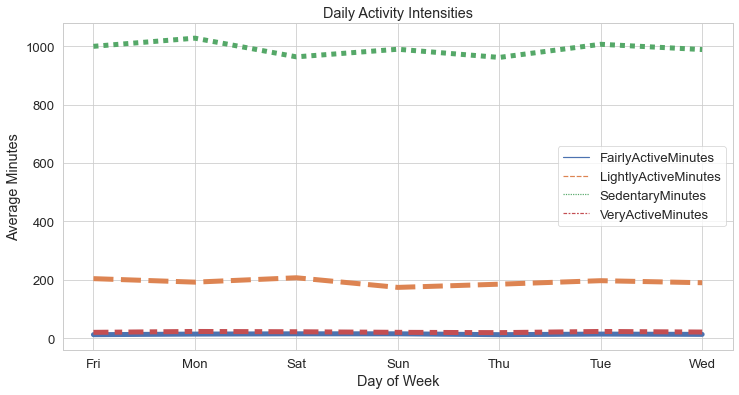

In [286]:
#Let's now plot the minutes version
plt.figure(figsize=(12,6))
sns.lineplot(data=[dailyAct_pivot['FairlyActiveMinutes'],dailyAct_pivot['LightlyActiveMinutes'],dailyAct_pivot['SedentaryMinutes'],dailyAct_pivot['VeryActiveMinutes']],linewidth=5)
plt.ylabel('Average Minutes')
plt.title('Daily Activity Intensities')

Text(0.5, 1.0, 'Daily Physical Activity')

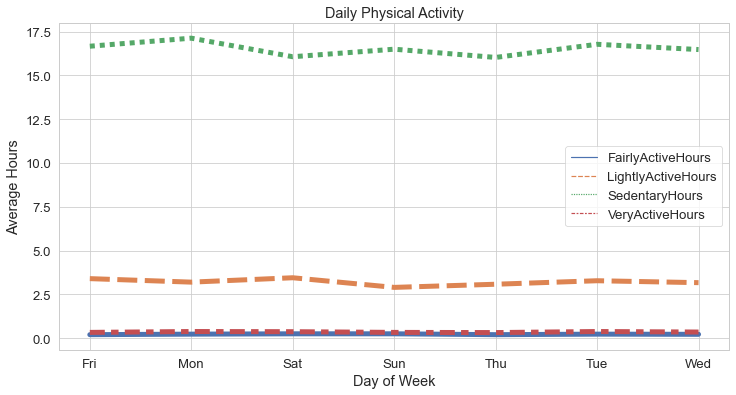

In [287]:
# Let's now plot the hours version --> this one looks better and more understandable
plt.figure(figsize=(12,6))
sns.lineplot(data=[dailyAct_pivot['FairlyActiveHours'],dailyAct_pivot['LightlyActiveHours'],dailyAct_pivot['SedentaryHours'],dailyAct_pivot['VeryActiveHours']],linewidth=5)
plt.ylabel('Average Hours')
plt.title('Daily Physical Activity')

In [288]:
#Sedentary vs Active Hours
print('Average SEDENTARY Hours per Day:',round(dailyAct_pivot['SedentaryHours'].mean(),2))
print('Average VERY Active Hours per Day:',round(dailyAct_pivot['VeryActiveHours'].mean(),2))
print('Average FAIRLY Active Hours per Day:',round(dailyAct_pivot['FairlyActiveHours'].mean(),2))
print('Average LIGHTLY Active Hours per Day:',round(dailyAct_pivot['LightlyActiveHours'].mean(),2))

Average SEDENTARY Hours per Day: 16.52
Average VERY Active Hours per Day: 0.35
Average FAIRLY Active Hours per Day: 0.23
Average LIGHTLY Active Hours per Day: 3.21


Observations
* We can see that users are mostly SEDENTARY
* At most, they do LIGHT ACTIVITY
    - Inference: probably walking is their only activity.
* There are records of FAIRLY ACTIVE and VERY ACTIVE hours but these are very small

8.  What is the general trend for users' heart rate?

In [289]:
# This data set has over 2 million rows that's why it takes a long time to run this
# We're using and manipulating it anyway the same way we did to others
heartRate['Hour'] = [pd.to_datetime(x).strftime('%H:%M:%S') for x in heartRate['Time']]
heartRate['Hour'] = pd.to_datetime(heartRate['Hour'])
heartRate['Hour'] = heartRate['Hour'].apply(lambda x:x.time())
heartRate['Date'] = pd.to_datetime(heartRate['Time'])
heartRate.insert(loc=3,column='Day of Week',value=heartRate['Date'].apply(lambda x:x.day_of_week))
heartRate['Day of Week'] = heartRate['Day of Week'].map(dmap)
heartRate.insert(loc=5,column='Hour of Day',value=heartRate['Hour'].apply(lambda x:x.hour))
heartRate.insert(loc=6,column='Minute',value=heartRate['Hour'].apply(lambda x:x.minute/60))
heartRate.insert(loc=7,column='Converted Time',value=round(heartRate['Hour of Day'] + heartRate['Minute'],5))

In [290]:
heartRate.head()

,Id,Time,Value,Day of Week,Hour,Hour of Day,Minute,Converted Time,Date
0,2022484408,4/12/2016 7:21:00 AM,97,Tue,07:21:00,7,0.35,7.35,2016-04-12 07:21:00
1,2022484408,4/12/2016 7:21:05 AM,102,Tue,07:21:05,7,0.35,7.35,2016-04-12 07:21:05
2,2022484408,4/12/2016 7:21:10 AM,105,Tue,07:21:10,7,0.35,7.35,2016-04-12 07:21:10
3,2022484408,4/12/2016 7:21:20 AM,103,Tue,07:21:20,7,0.35,7.35,2016-04-12 07:21:20
4,2022484408,4/12/2016 7:21:25 AM,101,Tue,07:21:25,7,0.35,7.35,2016-04-12 07:21:25


Text(0.5, 0, 'Hour of the Day')

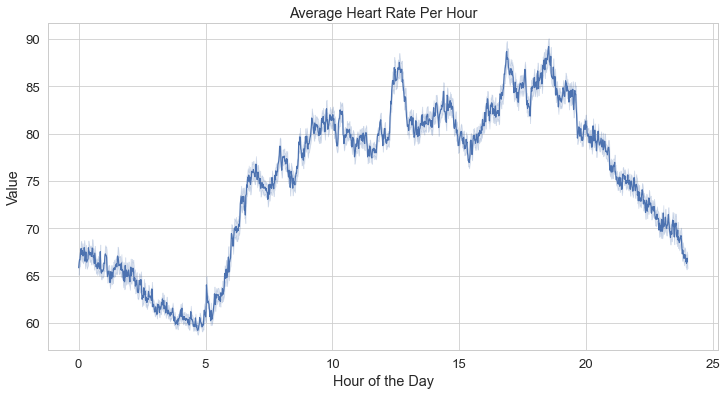

In [291]:
# This line plot shows every single data point in the converted time column
plt.figure(figsize=(12,6))
sns.lineplot(x='Converted Time',y='Value',data=heartRate)
plt.title('Average Heart Rate Per Hour')
plt.xlabel('Hour of the Day')

Text(0.5, 1.0, 'Average Heart Rate Per Hour')

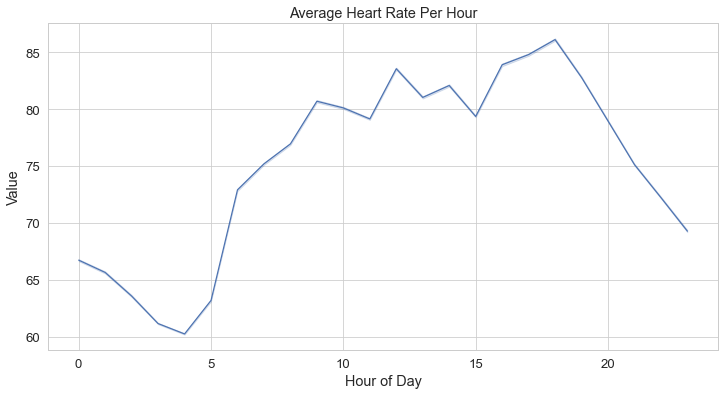

In [292]:
# We're just plotting a 'per hour' version because it looks cleaner (looks the same anyway)
plt.figure(figsize=(12,6))
sns.lineplot(x='Hour of Day',y='Value',data=heartRate)
plt.title('Average Heart Rate Per Hour')

Text(0.5, 1.0, 'Average Heart Rate Per Day')

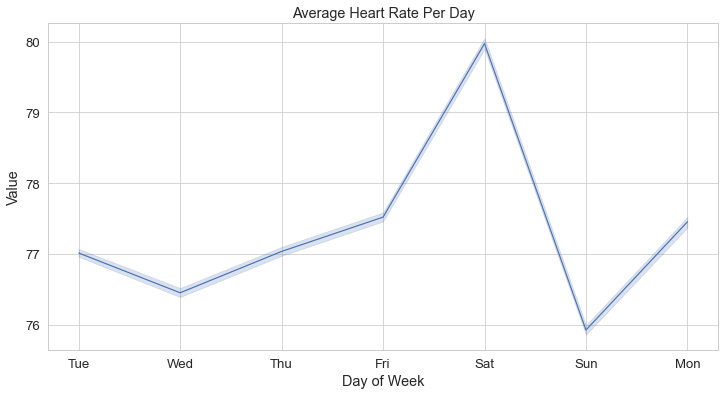

In [293]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Day of Week',y='Value',data=heartRate)
plt.title('Average Heart Rate Per Day')

Observation:
* Pretty standard heart rates. So far, we're seeing that consistent trend of customers being sedentary to lightly active

9. What time do customers typically go to sleep?

In [294]:
# Let's take a look at their sleeping schedule on a minute level
# Again, we convert that minutes to decimals so we can plot it and see a 24-hour period
minuteSleep.insert(loc=1,column='Customer',value=minuteSleep['Id'].map(Customers))
minuteSleep['date'] = pd.to_datetime(minuteSleep['date'])
minuteSleep.insert(loc=3,column='Day of Week',value=minuteSleep['date'].apply(lambda x:x.day_of_week))
minuteSleep['Day of Week'] = minuteSleep['Day of Week'].map(dmap)
minuteSleep.insert(loc=4,column='Hour',value=minuteSleep['date'].apply(lambda x:x.hour))
minuteSleep.insert(loc=5,column='Minute',value=minuteSleep['date'].apply(lambda x:x.minute/60))
minuteSleep.insert(loc=6,column='Converted Time',value=round(minuteSleep['Hour'] + minuteSleep['Minute'],5))

In [295]:
minuteSleep.head()

,Id,Customer,date,Day of Week,Hour,Minute,Converted Time,value,logId
0,1503960366,Customer 1,2016-04-12 02:47:30,Tue,2,0.783333,2.78333,3,11380564589
1,1503960366,Customer 1,2016-04-12 02:48:30,Tue,2,0.800000,2.80000,2,11380564589
2,1503960366,Customer 1,2016-04-12 02:49:30,Tue,2,0.816667,2.81667,1,11380564589
3,1503960366,Customer 1,2016-04-12 02:50:30,Tue,2,0.833333,2.83333,1,11380564589
4,1503960366,Customer 1,2016-04-12 02:51:30,Tue,2,0.850000,2.85000,1,11380564589


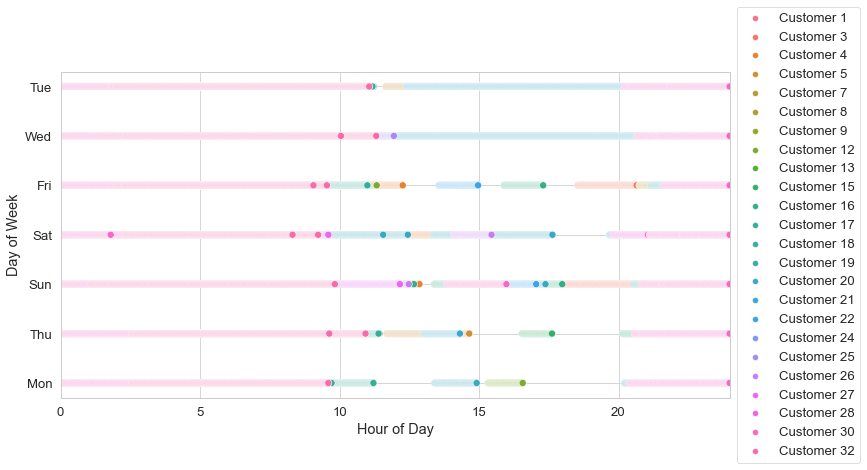

In [296]:
plt.figure(figsize=(12,6))
plot = sns.scatterplot(x='Converted Time',y='Day of Week',hue='Customer',s=50,data=minuteSleep)
plot.set_xlim(0,24)
plt.xlabel('Hour of Day')
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))

Observations:
- Inconsistent data entries from users
- We couldn't find a clear start and end sleep time
- Confusing sleeping patterns even when we look at each customers one by one
- No distinct sleeping patterns
- Question: are they still wearing the product while they sleep? Or is the product not that efficient in tracking sleep?

10. Which day of the week do customers sleep the longest?

In [297]:
# From minutes, let's now take a look at sleep trends in days
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'])
sleepDay.insert(loc=2,column='Day of Week',value=sleepDay['SleepDay'].apply(lambda x:x.day_of_week))
sleepDay['Day of Week'] = sleepDay['Day of Week'].map(dmap)
sleepDay.insert(loc=5,column='Time Asleep',value=[converter(x) for x in sleepDay['TotalMinutesAsleep']])
sleepDay['Time Asleep'] = sleepDay['Time Asleep'].apply(lambda x:float(x))
sleepDay.insert(loc=7,column='Time In Bed',value=[converter(x) for x in sleepDay['TotalTimeInBed']])
sleepDay['Time In Bed'] = sleepDay['Time In Bed'].apply(lambda x:float(x))

In [298]:
sleepDay.head()

,Id,SleepDay,Day of Week,TotalSleepRecords,TotalMinutesAsleep,Time Asleep,TotalTimeInBed,Time In Bed
0,1503960366,2016-04-12,Tue,1,327,5.45,346,5.77
1,1503960366,2016-04-13,Wed,2,384,6.40,407,6.78
2,1503960366,2016-04-15,Fri,1,412,6.87,442,7.37
3,1503960366,2016-04-16,Sat,2,340,5.67,367,6.12
4,1503960366,2016-04-17,Sun,1,700,11.67,712,11.87


In [299]:
sleepDay_pivot = sleepDay.pivot_table(index='Day of Week',values=['Time Asleep','Time In Bed'])
sleepDay_pivot['Time Asleep'] = [round(x,2) for x in sleepDay_pivot['Time Asleep']]
sleepDay_pivot['Time In Bed'] = [round(x,2) for x in sleepDay_pivot['Time In Bed']]
sleepDay_pivot['Difference'] = sleepDay_pivot['Time In Bed'] - sleepDay_pivot['Time Asleep']
sleepDay_pivot.sort_values('Time Asleep',ascending=False)

,Time Asleep,Time In Bed,Difference
Day of Week,,,
Sun,7.55,8.39,0.84
Wed,7.25,7.83,0.58
Sat,7.01,7.69,0.68
Mon,6.98,7.60,0.62
Fri,6.76,7.42,0.66
Tue,6.74,7.39,0.65
Thu,6.71,7.26,0.55


Text(0.5, 1.0, 'Time Asleep vs Time In Bed')

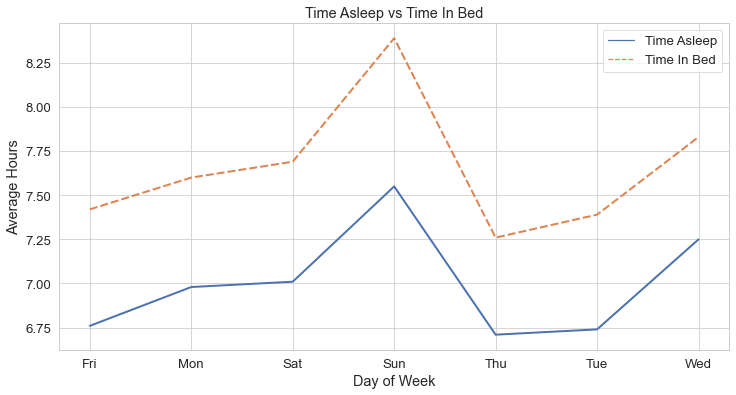

In [300]:
#Hours
plt.figure(figsize=(12,6))
sns.lineplot(data=[sleepDay_pivot['Time Asleep'],sleepDay_pivot['Time In Bed']],linewidth=2)
plt.ylabel('Average Hours')
plt.title('Time Asleep vs Time In Bed')

In [301]:
print('Average Time Asleep:',round(sleepDay_pivot['Time Asleep'].mean()))
print('Average Time In Bed:',round(sleepDay_pivot['Time In Bed'].mean()))
print('Average Difference:',round(sleepDay_pivot['Difference'].mean()))

Average Time Asleep: 7
Average Time In Bed: 8
Average Difference: 1


Observations
* Customers sleep and stay in bed the longest on Sundays
* On average, they spend one hour more on bed every day

11. What are some trends on users' weight?

In [302]:
weightInfo['Date'] = pd.to_datetime(weightInfo['Date'])
weightInfo.insert(loc=1,column='Customer',value=weightInfo['Id'].map(Customers))
weightInfo.insert(loc=3,column='Day',value=weightInfo['Date'].apply(lambda x:x.date()))
weightInfo.insert(loc=4,column='Day of Week',value=weightInfo['Date'].apply(lambda x:x.day_of_week))
weightInfo.insert(loc=5,column='Hour',value=weightInfo['Date'].apply(lambda x:x.time()))
weightInfo['Day of Week'] = weightInfo['Day of Week'].map(dmap)

In [303]:
weightInfo.head()

,Id,Customer,Date,Day,Day of Week,Hour,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,Customer 1,2016-05-02 23:59:59,2016-05-02,Mon,23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,Customer 1,2016-05-03 23:59:59,2016-05-03,Tue,23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,Customer 5,2016-04-13 01:08:52,2016-04-13,Wed,01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,Customer 10,2016-04-21 23:59:59,2016-04-21,Thu,23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,Customer 10,2016-05-12 23:59:59,2016-05-12,Thu,23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


Text(0.5, 1.0, 'Users Weight Data Entries per Day')

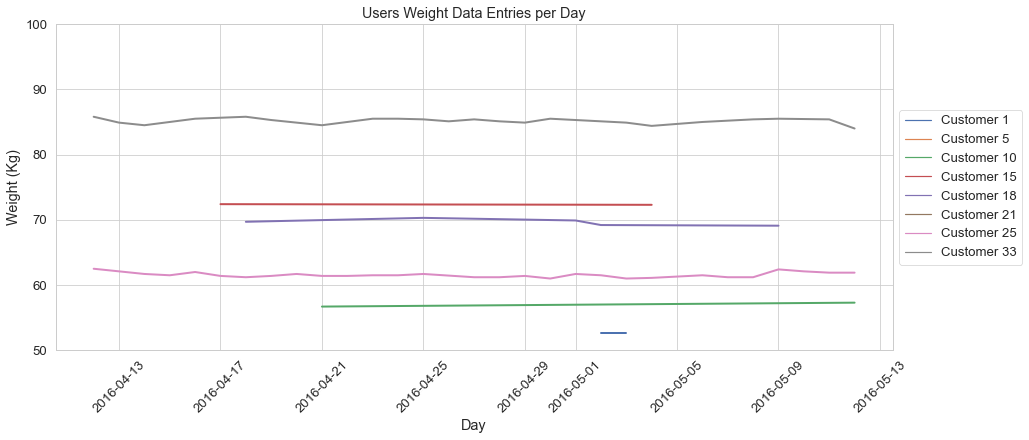

In [304]:
plt.figure(figsize=(15,6))
weight_plt = sns.lineplot(x='Day',y='WeightKg',hue='Customer',data=weightInfo,linewidth=2)
weight_plt.set_ylim(50,100)
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))
plt.xticks(rotation=45)
plt.ylabel('Weight (Kg)')
plt.title('Users Weight Data Entries per Day')

In [305]:
weightInfo_pivot = weightInfo.pivot_table(index='Day',columns='Customer',values='WeightKg')
weightInfo_pivot

Customer,Customer 1,Customer 10,Customer 15,Customer 18,Customer 21,Customer 25,Customer 33,Customer 5
Day,,,,,,,,
2016-04-12,NaN,NaN,NaN,NaN,NaN,62.500000,85.800003,NaN
2016-04-13,NaN,NaN,NaN,NaN,NaN,62.099998,84.900002,133.5
2016-04-14,NaN,NaN,NaN,NaN,NaN,61.700001,84.500000,NaN
2016-04-15,NaN,NaN,NaN,NaN,NaN,61.500000,NaN,NaN
2016-04-16,NaN,NaN,NaN,NaN,NaN,62.000000,85.500000,NaN
2016-04-17,NaN,NaN,72.400002,NaN,90.699997,61.400002,NaN,NaN
2016-04-18,NaN,NaN,NaN,69.699997,NaN,61.200001,85.800003,NaN
2016-04-19,NaN,NaN,NaN,NaN,NaN,61.400002,85.300003,NaN
2016-04-20,NaN,NaN,NaN,NaN,NaN,61.700001,84.900002,NaN


Observations:
* Like what we saw on sleep, the weight data entries are pretty inconsistent
* Only a few customers had entries in this area
* Pretty straight line in weight data
    - This further solidifies my inference that these customers are not really active

#### Summary Observations
* Customers are generally mostly sedentary.
* Customers in general only engage in light activities, probably just walking.
* Customers tend to move more on Saturdays and Tuesdays, then not so much on Sundays. 
* They sleep the most on Sundays. It's probably a rest day for most of them.
* Consistent trends in different data sets, all pointing to users being sedentary.
* Inconsistent data entries for weight and sleep data. 

##### Note: For anyone who might be interested, again, I have a full presentation of this analysis posted on YouTube. Click [here](https://youtu.be/DopUN9gu2X0) to see the video. Thanks.

# END